## Проектное маркетинговое исследование

Необходимо провести анализ данных в компании, где большие расходы на рекламу, но они не оккупаются.

**Цель исследования:** Найти причины убытков и дать рекомендации. И ответить на вопросы:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Ход исследования:**
1. Обработать данные
2. Задать функции
3. Провести исследовательский анализ
4. Провести маркетинговый анализ
5. Оценить оккупаемость рекламы

### Знакомство с данными

In [111]:
#Импорт бибилотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
#Загрузка датасетов
try:
    visits, orders, costs = (
        pd.read_csv('D:\IT\python\yandex\DA\poject\sprint7\open_visits_info_short.csv'),
        pd.read_csv('D:\IT\python\yandex\DA\poject\sprint7\orders_info_short.csv'),
        pd.read_csv('D:\IT\python\yandex\DA\poject\sprint7\costs_info_short.csv')
    )
except:
    visits, orders, costs = (

        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )

Посмотрим на то, как выглядят данные.

In [113]:
display(visits, orders, costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [114]:
#Общая информация по данным
[print(i.info(), '\n') for i in [visits, orders, costs]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):


[None, None, None]

Пропусков нет. В датасете visits в столбцах Session Start и Session End, в orders в столбце Event Dt, в costs в столбце dt неправильный тип данных. Так же названия столбцов необходимо привести к стандартному "змеиному" виду.

### Преобразование данных

Переименум столбцы.

In [115]:
#приводим к нижнему регистру
for i in [visits, orders, costs]:
    i.columns = i.columns.str.lower()

In [116]:
#избавляемся от пробелов
visits = visits.rename(columns={'user id': 'user_id',
                       'session start': 'session_start', 'session end': 'session_end'})

orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})

#Проверим результат переименования сотолбцов.
[print(i.columns) for i in [visits, orders, costs]]

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


[None, None, None]

Приведем столбцы к нужному типу. costs['dt'] - преобразовываем при помощи dt.date, так как в дальнейшем нам понадобятся данные именно в этом формате.

In [117]:
visits['session_start'] = pd.to_datetime(visits['session_start'])

visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверяем результат.

In [118]:
[print(i.info(), '\n') for i in [visits, orders, costs]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usag

[None, None, None]

### Поиск дубликатов

Для поиска явных дубликатов все данные в столбцах приведем к нижнему регистру. И выполним поиск дубликатов.

In [119]:
for i in ['region', 'device', 'channel']:
    visits[i] = visits[i].str.lower()
    
costs['channel'] = costs['channel'].str.lower()

In [120]:
[print(i.duplicated().sum()) for i in [visits, orders, costs]]

0
0
0


[None, None, None]

Явных дубликатов необнаруженно.
Попробуем найти явные дубликаты по ключевым столбцам.

In [121]:
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Искать дубликаты по ключевым столбцам будем в таблице visits. Будем скачать ключевыми стоблцами user_id, session_start и session_end. Предположение такое, что user_id в один момент времени находиться в разных регионах, или зайти с разных девайсов, или привлечься с разных каналов.

In [122]:
#поиск по началу сессии
print(visits.duplicated(subset=['user_id', 'session_start']).sum())

#поиск по окончанию сессии
visits.duplicated(subset=['user_id', 'session_end']).sum()

0


0

Дубликатов не найдено.

**Вывод:** В результате предобработке данных можно сделать вывод, что данные полные и не имеют явных искажений.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функция для создания профилей пользователей

In [123]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Функция для подсчёта Retention Rate

In [124]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для построения графика конверсии

In [125]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для подсчёта LTV

In [126]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функция для сглаживания данных

In [127]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Функция для построения графика Retention Rate

In [128]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Функция для построения графика конверсии

In [129]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Функция для визуализации LTV и ROI.

In [130]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Вывод:** Функции для анализа заданы, теперь можно переидти к исследованию

## Исследовательский анализ данных

### Профили пользователей.

Составляем профили пользователей.

In [131]:
profiles = get_profiles(visits, orders, costs)
print(display(profiles))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,tiptop,iphone,united states,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,pc,uk,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,tiptop,iphone,united states,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,mediatornado,pc,united states,2019-09-28,2019-09-01,False,0.205714


None


Определяем максимальные и минимальные даты привлечения пользователей.

In [132]:
min_analys_dt = profiles.dt.min()
max_analys_dt = profiles.dt.max()
print(f'min_date - {min_analys_dt}\nmax_date - {max_analys_dt}')

min_date - 2019-05-01
max_date - 2019-10-27


**Вывод:** В данном пункте был оставлен портрет пользователей. Из него видно, что стоимость привлеченных клиентов разная, что свидетельствует о верном расчете.

### Анализ стран пользователей

Из каких стран пользователи.

In [133]:
profiles.region.unique()

array(['united states', 'france', 'germany', 'uk'], dtype=object)

Находим из какой страны больше всего платящих пользователей.

In [134]:
profiles_payer = (profiles.query('payer == True').groupby('region')
                                .agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False))
print(display(profiles_payer))

,user_id
region,
united states,6902
uk,700
france,663
germany,616


None


Построим таблицу отражающую долю платящих пользователей.

In [135]:
#добавляем в таблицу всех пользователей
profiles_payer = (profiles_payer.merge(profiles.groupby('region').agg({'user_id': 'nunique'}), on='region', how='left')
                                .rename(columns={'user_id_x': 'payer_user', 'user_id_y': 'all_user'}))
print(profiles_payer.head(5))

               payer_user  all_user
region                             
united states        6902    100002
uk                    700     17575
france                663     17450
germany               616     14981


In [136]:
#находим долю платящих пользователей
profiles_payer['%_payer_from_all'] = profiles_payer.payer_user / profiles_payer.all_user * 100
print(display(profiles_payer))

,payer_user,all_user,%_payer_from_all
region,,,
united states,6902,100002,6.901862
uk,700,17575,3.982930
france,663,17450,3.799427
germany,616,14981,4.111875


None


**Вывод:** Больше всего платящих пользователей в США, а также доля платящих больше, чем в других странах. Остальные страны распределились равномерно.

### Анализ устройств пользователей

Посмтроим таблицу с утройствами, которыми пользуются пользователи, сколько из них платящих и какую долю они занимают.

In [137]:
#создаем таблицу с устройствами пользователей и выделяем платных пользователей
user_device = (profiles.groupby('device').agg({'user_id': 'nunique'})
                  .merge(profiles.query('payer == True').groupby('device').agg({'user_id': 'nunique'}),
                          on='device', how='left')
                    .rename(columns={'user_id_x': 'all_user', 'user_id_y': 'payer_user'}))

In [138]:
#считаем процент
user_device['%_payer_from_all'] = user_device.payer_user / user_device.all_user * 100
print(display(user_device.sort_values('%_payer_from_all', ascending=False)))

,all_user,payer_user,%_payer_from_all
device,,,
mac,30042,1912,6.364423
iphone,54479,3382,6.207897
android,35032,2050,5.851793
pc,30455,1537,5.046790


None


**Вывод:** У пользователей mac самый большой процент платящих пользователей, но по количеству пользователей он устапает всем остальным, почти в 2 раза больше пользователей iphone.

### Анализ рекламных источников

Посмтроим таблицу с источниками, сколько из них платящих и какую долю они занимают.

In [139]:
#создаем таблицу с источниками пользователей и выделяем платных пользователей
user_device = (profiles.groupby('channel').agg({'user_id': 'nunique'})
                  .merge(profiles.query('payer == True').groupby('channel').agg({'user_id': 'nunique'}),
                          on='channel', how='left')
                    .rename(columns={'user_id_x': 'all_user', 'user_id_y': 'payer_user'}))

#считаем процент
user_device['%_payer_from_all'] = user_device.payer_user / user_device.all_user * 100
print(display(user_device.sort_values('%_payer_from_all', ascending=False)))

,all_user,payer_user,%_payer_from_all
channel,,,
faceboom,29144,3557,12.204914
adnonsense,3880,440,11.340206
lambdamediaads,2149,225,10.469986
tiptop,19561,1878,9.600736
rocketsuperads,4448,352,7.913669
wahoonetbanner,8553,453,5.296387
yrabbit,4312,165,3.826531
mediatornado,4364,156,3.574702
leapbob,8553,262,3.063253


None


**Вывод:** Набиольшое число платящих пользователей пришло по источнику faceboom, и этот источник также занимает второе место по количеству пользователей. organic почти в 2 раза большое пользователей, но самый маленький процент платящих, примерно в 6 раз меньше, чем у faceboom.

**Вывод по шагу:** наиболее вероятно, что пользователь станет платящим по результату анализа получает, который из США, пользуется mac и пришел от источника faceboom.

## Маркетинг

### Общая сумма расходов

In [140]:
round(costs.costs.sum(), 1)

105497.3

**Вывод** Всего на маркейтинг потречено 105497.3

### Распределение трат по источникам.

In [141]:
costs.groupby('channel')['costs'].agg('sum').sort_values(ascending = False)

channel
tiptop                54751.30
faceboom              32445.60
wahoonetbanner         5151.00
adnonsense             3911.25
opplecreativemedia     2151.25
rocketsuperads         1833.00
leapbob                1797.60
lambdamediaads         1557.60
mediatornado            954.48
yrabbit                 944.22
Name: costs, dtype: float64

**Вывод** Наибольше рекламные затраты пришлись на источник tiptop, меньше всего на yrabbit.

### Визуализация динамики изменения расходов во времени по источникам.

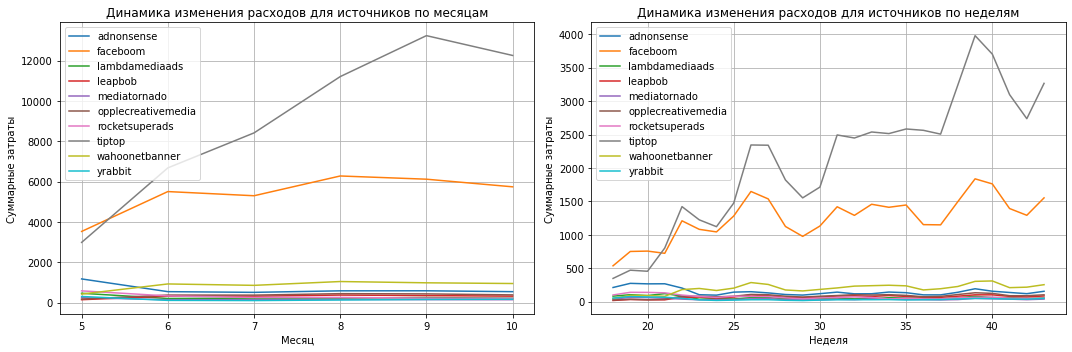

In [142]:
plt.figure(figsize = (15,5))
#график 1
ax1 = plt.subplot(1,2,1)
costs_pivot = costs.pivot_table(index=pd.to_datetime(costs['dt']).dt.month, columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Суммарные затраты')
plt.title('Динамика изменения расходов для источников по месяцам')

#график 2
ax2 = plt.subplot(1,2,2)
costs_pivot = costs.pivot_table(index=pd.to_datetime(costs['dt']).dt.isocalendar().week, columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax2)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Суммарные затраты')
plt.title('Динамика изменения расходов для источников по неделям')

plt.tight_layout()
plt.show()

**Вывод:** Затраты на рекламу по tiptop имеют тенденцию роста, а по faceboom со временем установилось на одном уровне. Что касается остальных источник, на них затраты на столько малы, что по общему графику не определить и их следует рассматривать отдельно.

### CAC

In [143]:
cac_channel = profiles.groupby('channel')['acquisition_cost'].agg('mean').sort_values(ascending = False)
cac_channel

channel
tiptop                2.799003
faceboom              1.113286
adnonsense            1.008054
lambdamediaads        0.724802
wahoonetbanner        0.602245
rocketsuperads        0.412095
opplecreativemedia    0.250000
yrabbit               0.218975
mediatornado          0.218717
leapbob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

**Вывод:** Дороже всего обходятся пользователи из источника titop. Organic 0, оно и понятно в этом случаи затрат нет.

In [144]:
profiles_mean = profiles.query('channel != "organic"')
round(profiles_mean['acquisition_cost'].mean(), 2)

1.13

Средний CAC по проекту 1.13, что говорит о том, что tiptop сильно много забирает денег, наврят ли эти пользователи смогут невелировать свою высокую стоимость.

**Вывод по шагу:** В ходе анализа источников выяснилось, что больше всего тратится на рекламу tiptop, и самый дорогой клиент тоже у них, а затраты только растут. 

## Окупаемость рекламы

### LTV и ROI

По условию сейчас 1 ноября, а окупаемость рекламы составляет 2 недели заложим эти условия. И исключим канал organic, так как на него нет затрат на рекламу.

In [145]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
ad_profiles = profiles.query('channel != "organic"')

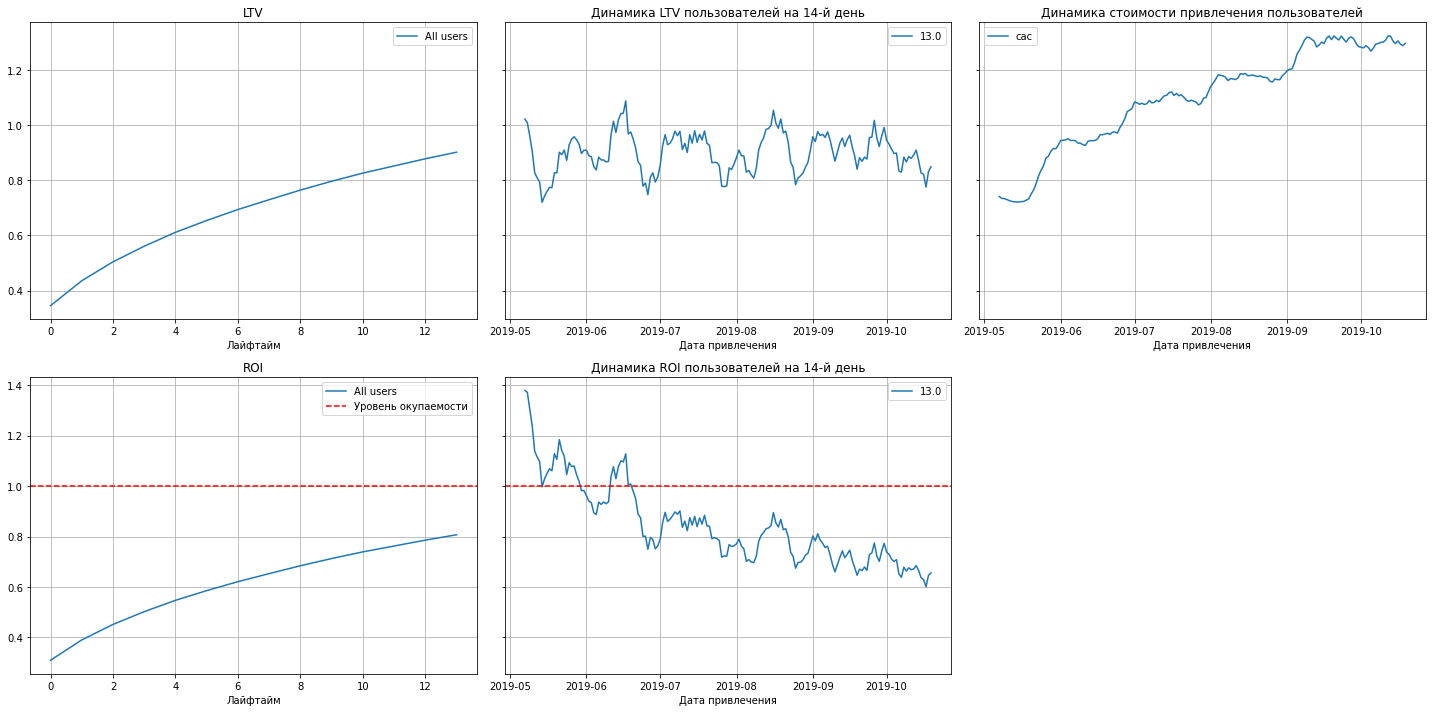

In [146]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод** Из график видно, не смотря на то, что LTV пользователя растет, при это ROI показывает, что клиенты недостаточно оккупаются. Если в 1 месяц CAC было низкое, то ROI было выше порога оккпумаимости, а дальше эти показатели так ухудшаются, что уже ниже порога, но при этом LTV пользователей примерно на одно уровне. Это может говорить о том, что затраты на рекламу не оправданы.

### Конверсия и удержание

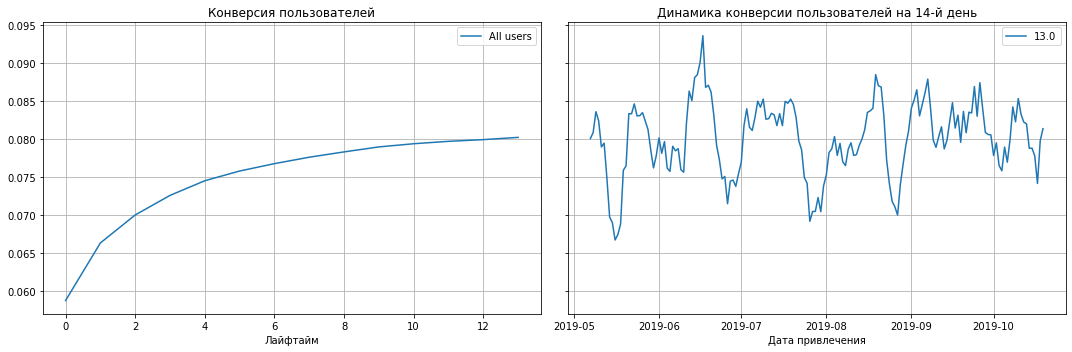

In [147]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

С увеличеним лайфтайма конверсия снижается, но вначале она показывала хорошие показатели. С теченим времени конверсия менялась скачками, в мае была самая большая просадка, но уже в июне самая большая.

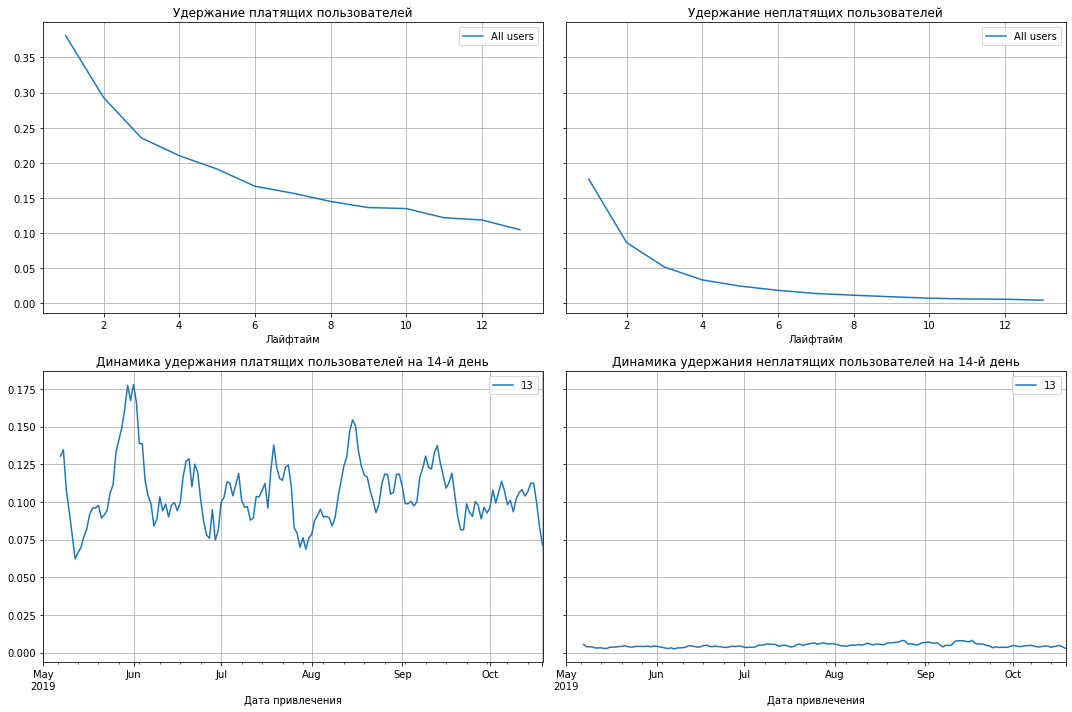

In [148]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей выше, чем неплатящих, что хорошо.

### Окупаемость рекламы с разбивкой по устройствам

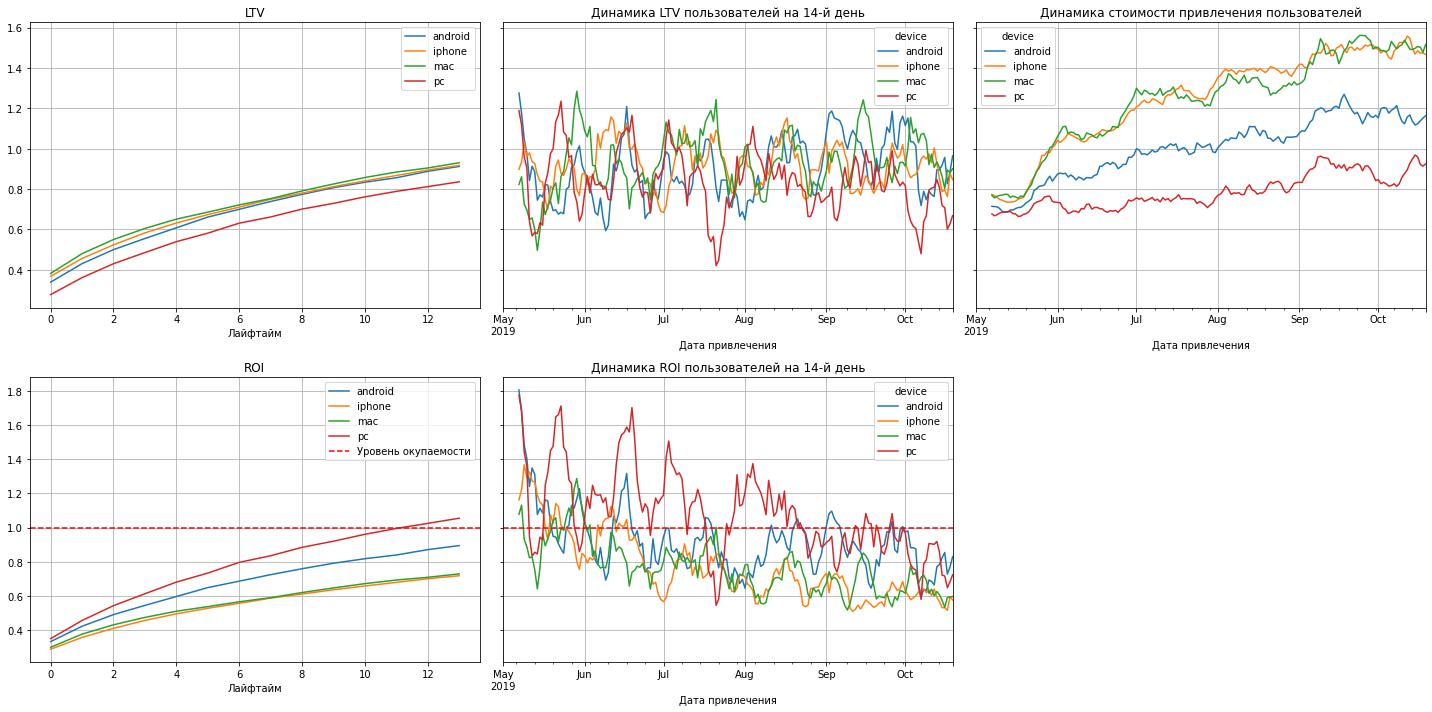

In [149]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=['device']
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** У устройств PC LTV ниже, чем у остальных, также во временном промежутке, у них есть заметные провалы относительно других. Но при это CAC самый маленький у них, потом идет android по этому показателю. Если смотреть на ROI, то только PC преодалаели порог окупаемости, но скорее всего из-за предыдущих более успешных месяцев. Проблема в том, что LTV не на столько быстро растет, как CAC. Нужно снизить затраты на рекламу относительно всех устройств, либо увеличить LTV. На PC более мягкое уменьшение затрат можно сделать, и с увеличением небольшим LTV приведет к оккупаемости.

### Окупаемость рекламы с разбивкой по странам

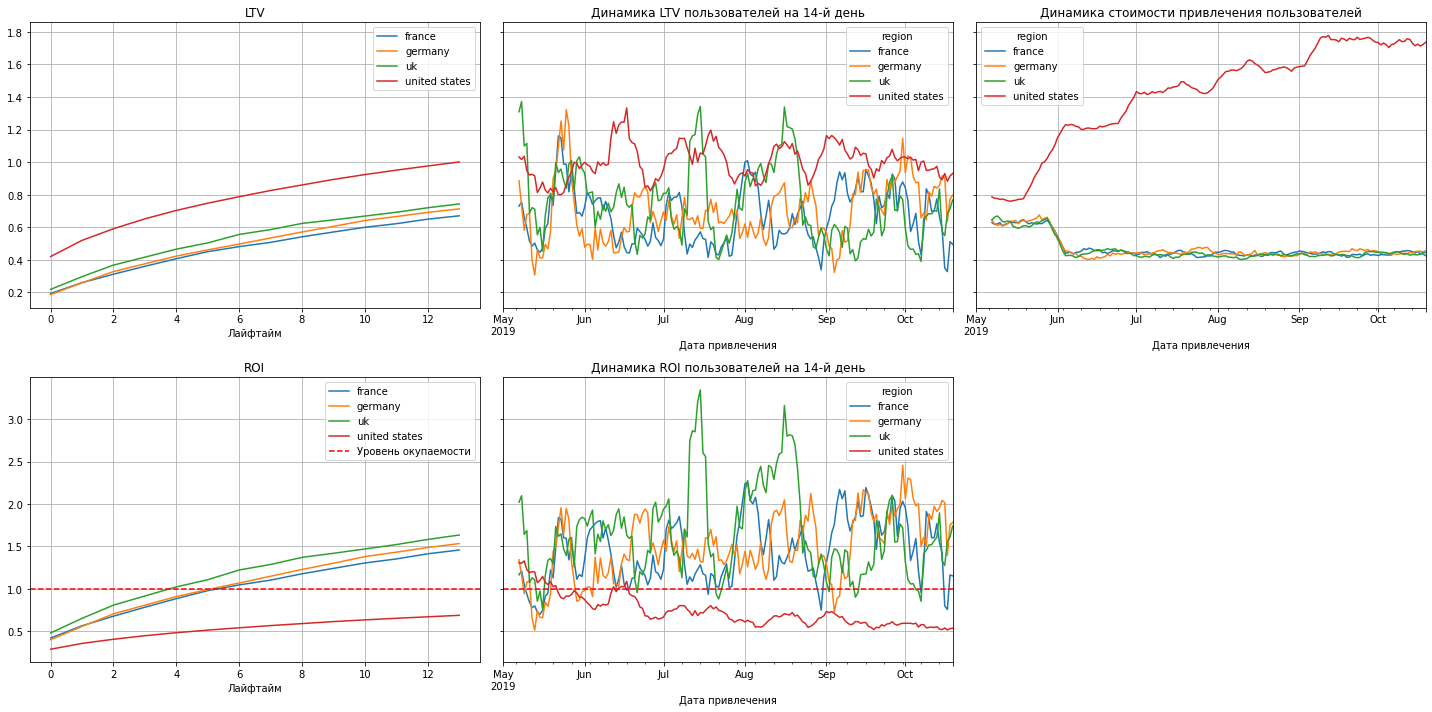

In [150]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=['region']
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод** В США самый большой LTV, но CAC намного больше, чем у остальных стран. Это приводит, то ROI для США ниже порога оккупаемости, чем у других. И с течении времени ROI только ухудшается. Высокий CAC привел к таким последствиям. Для США явно нужно снижать САС.

В uk можно попробовать увеличить рекламу.

### Окупаемость рекламы с разбивкой по рекламным каналам

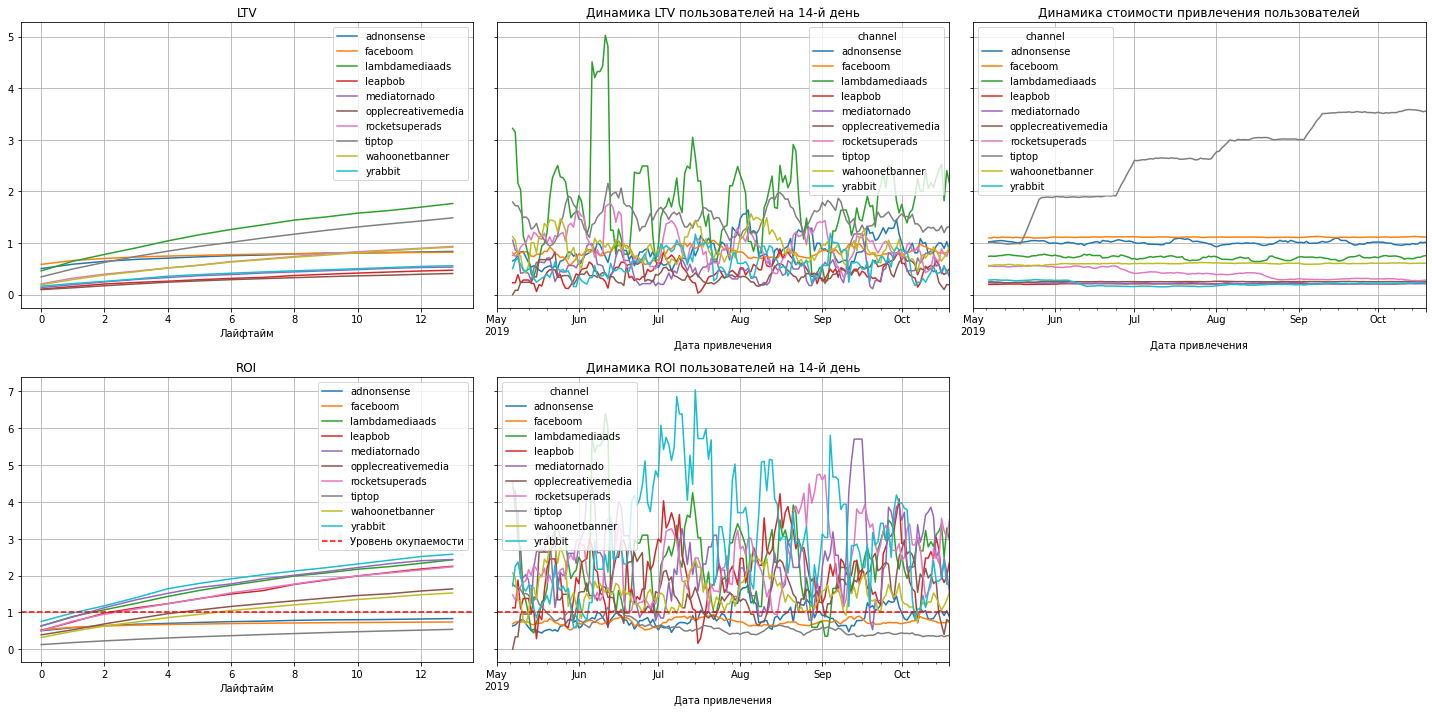

In [151]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** Лучший показатель LTV у lambdamediaads, затем идет tiptop. по динамики видно, что у lambdamediaads опережает остальные канала и есть большие пики. По CAC распределение у всех равномерное, кроме tiptop  у котрого сильный рост. ROI  ниже оккупаемости на первых лайфтаймах, но потом не смогли преодалеть порог tiptop, faceboom и adnonsense. И по динамики видно, что это из в месяца в месяц так. Очевидно, что выоские затраты на tiptop, не смотря на хороший LTV, привели к не оккупаемости. А у faceboom проблем с низким LTV и не маленьким CAC. У tiptop нужно снижать CAC.

А вот yrabbit хорошо оккупается, можно увеличить по ней рекламу.

### Анализ удержания и конверсии с разбивкой по каналам, стран, устройствам.

#### По устройствам

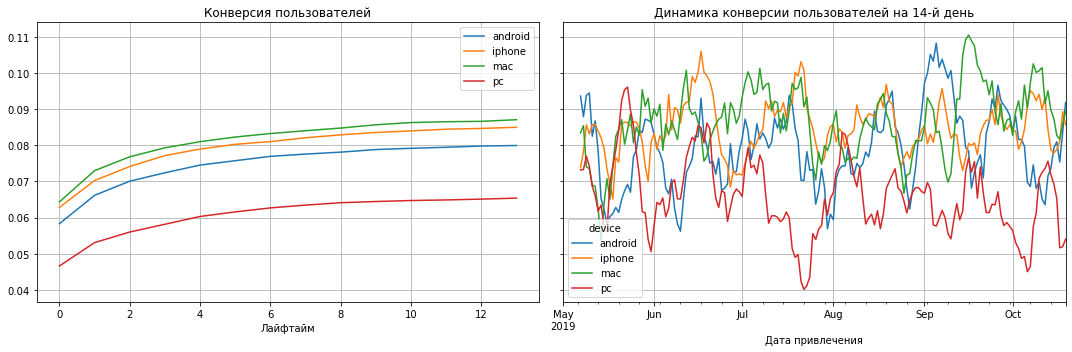

In [152]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days, dimensions = ['device'] 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

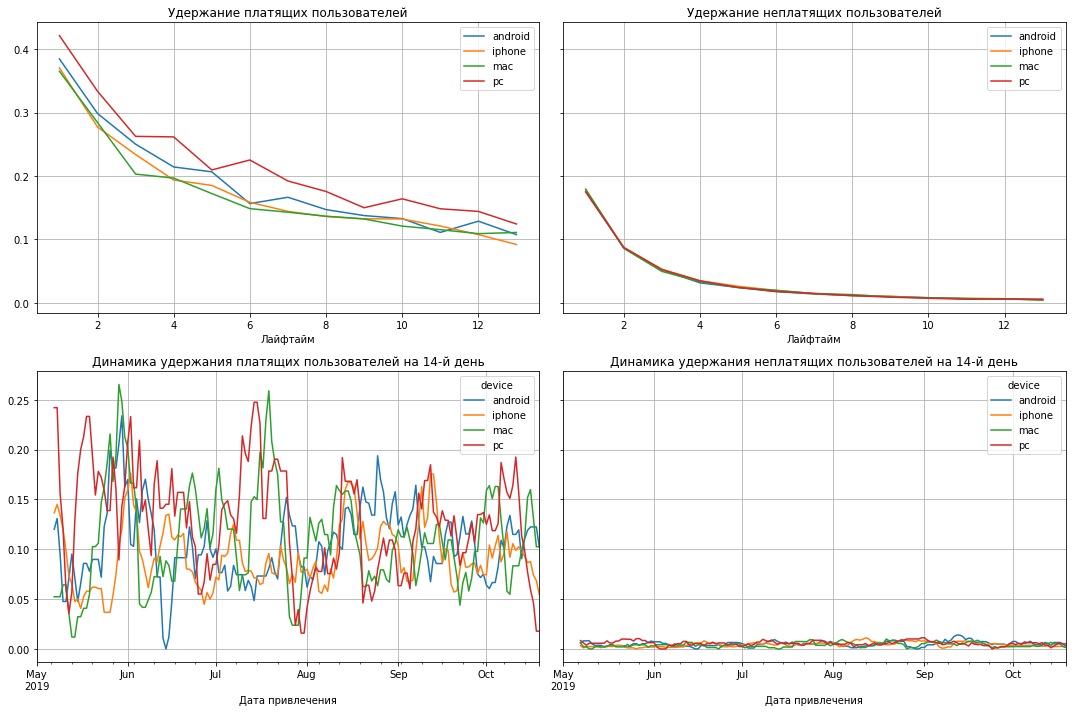

In [153]:
#удержание
retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days, dimensions = ['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** у PC удержание лучше, чем у остальных, но конверсия меньше. Это говорит нам о том, что пользователи PC хуже преходят в платящих, но зато пользуются продуктом больше. У mac лучшая конверсия. Остальные устройства имеют преимущество по стабильности.

#### По странам

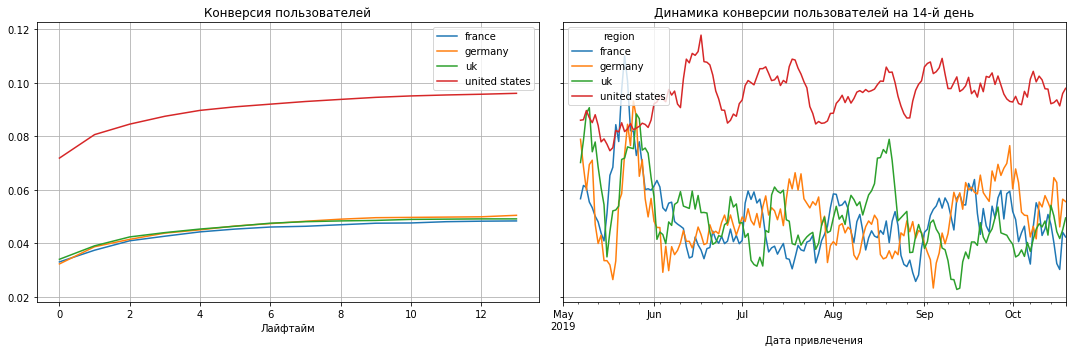

In [154]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days, dimensions = ['region'] 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

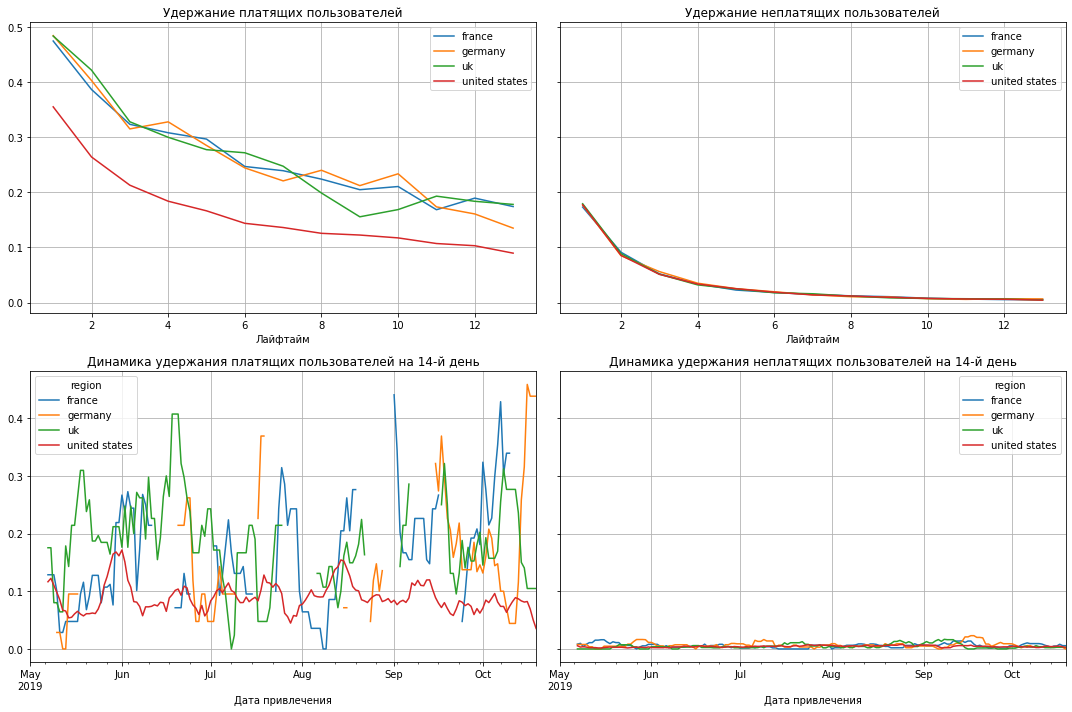

In [155]:
#удержание
retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days, dimensions = ['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** В США с значительным преимуществом ведет по конверсии, но уступает всем по удержанию. Хоть там и платят, но удержать таких пользователей на много сложнее. Стоит обратить внимание на остальные страны.

#### По каналам

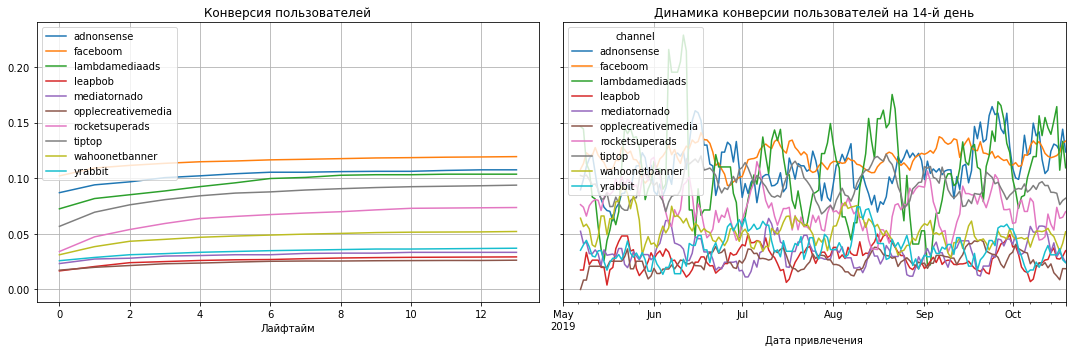

In [156]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days, dimensions = ['channel'] 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

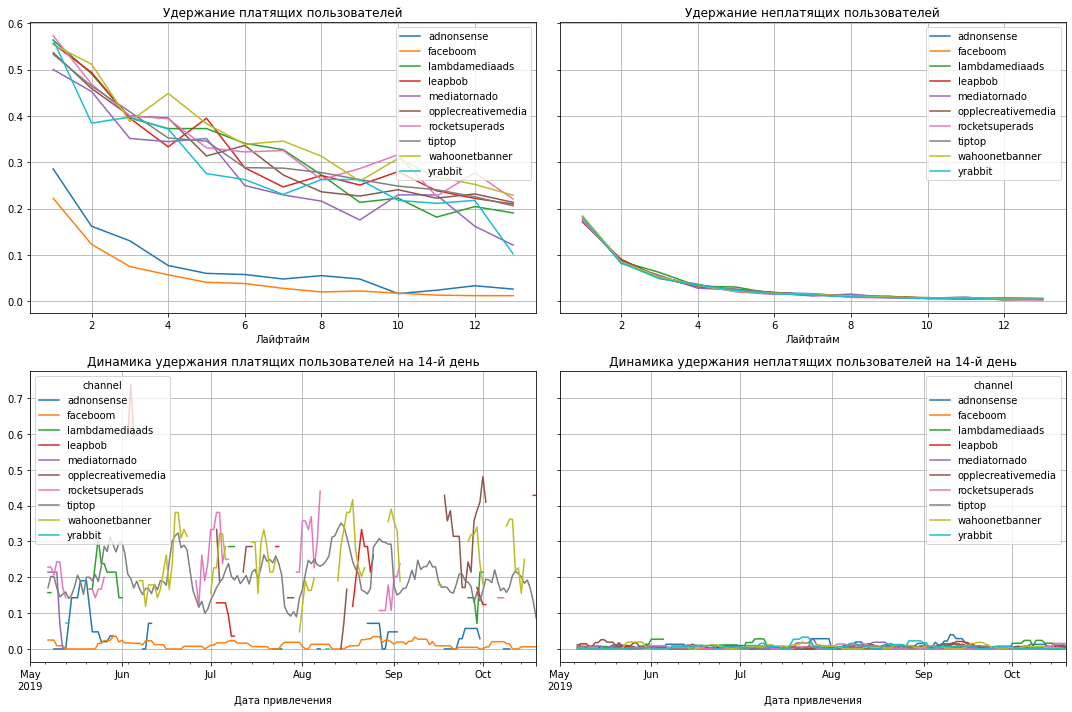

In [157]:
#удержание
retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days, dimensions = ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** adnonsense и faceboom конверсия лучше, чем у остальных, но удержание на много хуже. Стоит обратить внимание на золотую середину на каналы lambdamediaads и tiptop, которые выглядят более преспективнее.

### Ответы на вопросы

1. Окупается ли реклама, направленная на привлечение пользователей в целом?

Нет, не окуупается.

2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Устройства почти все, кроме PC, если будут небольшие изменения то начнут оккупаться. У США огромный CAC нужно с этим что-то делать, например, увеличивать удержание.

Tiptop получает много денег на рекламу, она не оккупается. Если снизить затраты, то из-за хорошей конверсии и удержания они могут начать оккупаться. Также faceboom тут не такие большие затраты, но выше, чем у остальных при среднем LTV. Если у них поднять удержание, то могут начать оккупаться. Что касается adnonsense там все средненькое, но оккупаемости от этого нет. Если увеличить удержание, то может привести к оккупаемости.

3. Чем могут быть вызваны проблемы окупаемости?

Низкое удержание и высокая стоимость рекламы. В США например могли сделать вывод по LTV и сделать больше рекламный бюджет в надежде на оккупаемость, но LTV растет не со размерно CAC, что привело к не оккупаемости. В США большая конкуренция, надо выделяться.

По устройствам, высокие затраты в целом на рекламу привели к таким результатам, надо было работать над удержанием. Если PC увеличить конверсию, то возможно начнут оккупаться. У данной платформы много бесплатных аналогов, которые могут переманивать пользователей.

По рекламным каналам не рассчитали объем распределения средств между каналами. В faceboom возможно людям нечем заняться, вот и плохое удержание. Также оно используется в первую очередь для общения, а не покупок.

**Вывод** Реклама не оккупается. В США надо снижать бюджет, или сильно поднимать удержание. Tiptop тоже самое. Faceboom надо увеличивать удержание. Стоит обратить на UK и yrabbit, и поработать над LTV PC.

## Вывод

Проведено исследование данных по рекламным компаниям. В ходе которого была оценена их оккупаемость. Дата исселдования была задана 1 ноября 2019, а горизонт 2 недели. При оценке оккупаемости были исключены пользователи пришедшие по источнику organic, так как на них затрат нет.

Выяснилось, что в целом реклама не оккупается, в некоторые направления вкладываются неоправданно много средств.

- Самый популярное устройство iphone. Но больше всего платящих клиентов на mac, но iphone не отстает у них чуть больше 6 процентов.
- Наибольшие расходы на рекламу по каналу tiptop и составляют 54751.3. Более вероятний клиент станет платящим, если пришел от faceboom.
- Больше всего в США пользователей и они же являются самыми платящими.
- CAC у tip больше, чем у остальных. У ближашего места faceboom в 2 раза меньше.

**Причины неэффективности:**
- Основная причина неэффективности в завышенном бюджете на рекламу в направлениях, которые имеют удержание ниже, чем затраты. Предполагаю, что бюджет строился из вывода, о том, что чем больше коверсия, тем больше бюджета нужно вложить. Данная стратегия привела к неоккупаемости.

**Рекомендации для отдела маркетинга:**
- В США надо снижать бюджет рекламы, так как LTV не соразмерно растет бюджету. Можно попробовать увеличить удержание. Стоит обратить внимание на рынок UK.
- На PC, если увеличить LTV, то можно выйти на оккупаемость. Увеличение конверсии должно поможчь. В целом по ним может выравнивниться ситуация после изменения в других направлениях.
- Источники у tiptop нужно урезать бюджет. У faceboom поднять LTV за счет увеличения удержания. В yrabbit есть смысл попробовать вложиться.